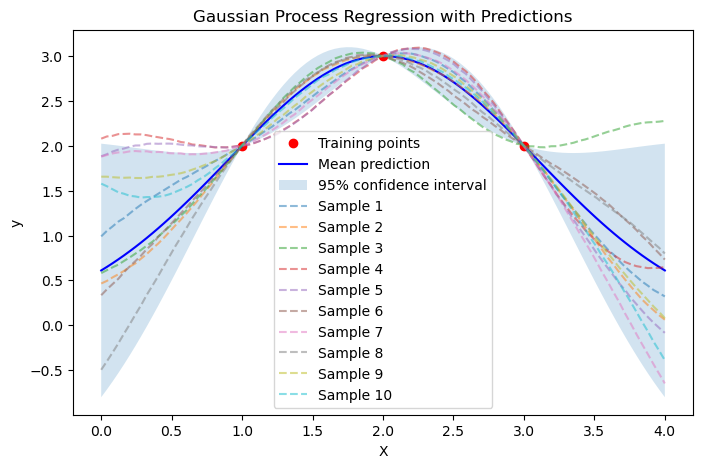

In [24]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def rbf_kernel(X1, X2, length_scale=1.0, sigma_f=1.0):
    """Radial Basis Function (RBF) kernel (Gaussian Kernel)."""
    sqdist = cdist(X1, X2, 'sqeuclidean')
    return sigma_f ** 2 * np.exp(-0.5 / length_scale ** 2 * sqdist)

def gaussian_process_regression(X_train, y_train, X_test, length_scale=1.0, sigma_f=1.0, noise=1e-5):
    """Gaussian Process Regression (GPR) implementation."""
    K = rbf_kernel(X_train, X_train, length_scale, sigma_f) + noise * np.eye(len(X_train))
    K_s = rbf_kernel(X_train, X_test, length_scale, sigma_f)
    K_ss = rbf_kernel(X_test, X_test, length_scale, sigma_f) + noise * np.eye(len(X_test))
    
    K_inv = np.linalg.inv(K)
    
    # Mean prediction
    mu_s = K_s.T @ K_inv @ y_train
    
    # Covariance prediction
    cov_s = K_ss - K_s.T @ K_inv @ K_s
    
    return mu_s, cov_s

def predict(X_train, y_train, X_test, length_scale=1.0, sigma_f=1.0, noise=1e-5, num_samples=10):
    """Generate predictions with uncertainty sampling."""
    mu_s, cov_s = gaussian_process_regression(X_train, y_train, X_test, length_scale, sigma_f, noise)
    samples = np.random.multivariate_normal(mu_s, cov_s, num_samples)
    return mu_s, cov_s, samples

# Example usage:
X_train = np.array([[1], [2], [3]])
y_train = np.array([2, 3, 2])
X_test = np.linspace(0, 4, 100).reshape(-1, 1)

mu_s, cov_s, samples = predict(X_train, y_train, X_test)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(X_train, y_train, "ro", label="Training points")
plt.plot(X_test, mu_s, "b-", label="Mean prediction")
plt.fill_between(X_test.flatten(), 
                 mu_s - 1.96 * np.sqrt(np.diag(cov_s)), 
                 mu_s + 1.96 * np.sqrt(np.diag(cov_s)), 
                 alpha=0.2, label="95% confidence interval")
for i in range(samples.shape[0]):
    plt.plot(X_test, samples[i], "--", alpha=0.5, label=f"Sample {i+1}")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gaussian Process Regression with Predictions")
plt.show()

In [ ]:
cov_s

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636],
       [0.4040404 ],
       [0.44444444],
       [0.48484848],
       [0.52525253],
       [0.56565657],
       [0.60606061],
       [0.64646465],
       [0.68686869],
       [0.72727273],
       [0.76767677],
       [0.80808081],
       [0.84848485],
       [0.88888889],
       [0.92929293],
       [0.96969697],
       [1.01010101],
       [1.05050505],
       [1.09090909],
       [1.13131313],
       [1.17171717],
       [1.21212121],
       [1.25252525],
       [1.29292929],
       [1.33333333],
       [1.37373737],
       [1.41414141],
       [1.45454545],
       [1.49494949],
       [1.53535354],
       [1.57575758],
       [1.61616162],
       [1.65656566],
       [1.6969697 ],
       [1.73737374],
       [1.77777778],
       [1.81818182],
       [1.85858586],
       [1.898